<a href="https://colab.research.google.com/github/AndrewSlutsky/MOC_1/blob/main/MOC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

from random import choice

variant = '15'

Запись таблиц из файлов в np массивы

In [5]:
prob = np.genfromtxt(f'prob_{variant}.csv', delimiter = ',')
table = np.genfromtxt(f'table_{variant}.csv', delimiter = ',', dtype = int)

Визуализация таблицы вероятностных распределений

In [6]:
pd.DataFrame(data = table, index = [f'k{i}' for i in range(20)], columns = [f'M{i}' for i in range(20)])

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19
k0,2,14,17,12,3,15,4,5,0,6,9,16,1,7,13,19,18,11,10,8
k1,11,17,4,8,16,3,12,15,0,14,6,19,5,2,7,1,10,18,13,9
k2,13,17,15,11,9,10,2,8,18,14,6,19,3,12,7,1,5,0,16,4
k3,15,9,17,13,19,11,12,2,3,18,1,14,4,6,8,16,7,5,0,10
k4,5,7,4,2,17,13,1,15,12,0,6,14,3,19,10,18,9,16,8,11
k5,8,16,6,11,3,17,14,10,19,7,5,18,4,1,12,0,2,13,15,9
k6,2,6,13,12,1,7,5,0,15,10,8,3,9,16,18,19,14,11,17,4
k7,19,15,4,8,17,18,16,6,10,7,2,1,3,5,11,0,12,13,14,9
k8,13,8,18,4,17,3,1,16,10,5,9,19,2,6,11,7,12,14,0,15
k9,9,6,15,13,0,1,12,2,19,14,18,4,3,7,8,16,10,11,17,5


ШТ от С0 до С19, находим все индексы соответствующих значений для вычисления вероятностного распределения ШТ согласно формуле:

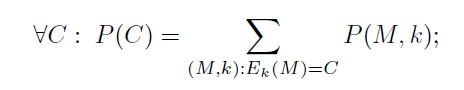


Функция для вычисления вероятности конкретного ШТ по индексам ключей и ОТ, которые его порождают и функция для получения вероятностного распределения ШТ

In [7]:
def get_C_probability(indexes):
    s = 0
    for i in range(20):
        s += (prob[0][indexes[1][i]] * prob[1][indexes[0][i]])
    return s

def get_C_distribution():
    ret = []
    for i in range(20):
        ret.append(get_C_probability(np.where(table == i)))
    return np.array(ret)

Вероятностное распределение ШТ представлено в таблице:

In [8]:
pd.DataFrame(data = [get_C_distribution()], index = ['P'], columns = [f'C{i}' for i in range(20)])

,C0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19
P,0.0364,0.0428,0.0476,0.0476,0.054,0.0396,0.0492,0.046,0.0604,0.046,0.0396,0.054,0.0508,0.0588,0.0444,0.0556,0.0508,0.0812,0.046,0.0492


Функция для вычисления совместных вероятностей конкретного ШТ по всем ОТ согласно формуле
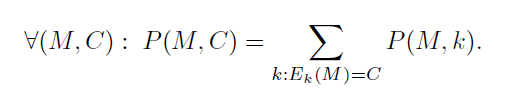

, и функция для получения таблицы совместных вероятностей всех ШТ по всем ОТ

In [9]:
def get_MC_probability(C):
    ret = []
    for i in range(20):
        indexes = np.where(table.T[i] == C)[0]
        if indexes.size == 0:
            ret.append(0.0)
        else:
            s = 0
            for j in indexes:
                s += (prob[0][i] * prob[1][j])
            ret.append(s)
    return np.array(ret)

def get_MC_probabilities():
    prob_table = []
    for i in range(20):
        prob_table.append(get_MC_probability(i))
    return np.array(prob_table).T

Таблица в которой представлены все совместные вероятности

In [10]:
pd.DataFrame(data = get_MC_probabilities().T, index = [f'C{i}' for i in range(20)], columns = [f'M{i}' for i in range(20)])

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19
C0,0.0000,0.0000,0.0000,0.0044,0.0044,0.0000,0.0000,0.0012,0.0084,0.0012,0.0024,0.0000,0.0012,0.0024,0.0000,0.0048,0.0000,0.0012,0.0036,0.0012
C1,0.0044,0.0000,0.0000,0.0044,0.0088,0.0012,0.0024,0.0000,0.0012,0.0000,0.0012,0.0012,0.0042,0.0024,0.0012,0.0054,0.0012,0.0000,0.0012,0.0024
C2,0.0198,0.0000,0.0000,0.0044,0.0000,0.0024,0.0012,0.0072,0.0000,0.0000,0.0012,0.0000,0.0024,0.0042,0.0012,0.0012,0.0024,0.0000,0.0000,0.0000
C3,0.0000,0.0000,0.0000,0.0000,0.0242,0.0054,0.0012,0.0000,0.0012,0.0012,0.0000,0.0012,0.0060,0.0000,0.0024,0.0000,0.0012,0.0012,0.0000,0.0024
C4,0.0000,0.0044,0.0242,0.0044,0.0000,0.0000,0.0054,0.0000,0.0000,0.0012,0.0024,0.0012,0.0024,0.0036,0.0012,0.0000,0.0000,0.0000,0.0000,0.0036
C5,0.0132,0.0000,0.0000,0.0000,0.0000,0.0000,0.0024,0.0042,0.0012,0.0024,0.0024,0.0024,0.0054,0.0012,0.0000,0.0000,0.0024,0.0012,0.0000,0.0012
C6,0.0088,0.0088,0.0088,0.0000,0.0000,0.0012,0.0000,0.0024,0.0000,0.0042,0.0066,0.0012,0.0000,0.0024,0.0012,0.0000,0.0012,0.0012,0.0000,0.0012
C7,0.0000,0.0044,0.0044,0.0044,0.0088,0.0012,0.0000,0.0000,0.0000,0.0036,0.0000,0.0012,0.0000,0.0054,0.0066,0.0012,0.0024,0.0000,0.0012,0.0012
C8,0.0044,0.0088,0.0000,0.0242,0.0044,0.0000,0.0012,0.0012,0.0000,0.0012,0.0024,0.0012,0.0000,0.0000,0.0036,0.0000,0.0012,0.0000,0.0024,0.0042
C9,0.0044,0.0044,0.0000,0.0088,0.0044,0.0012,0.0000,0.0000,0.0012,0.0000,0.0054,0.0012,0.0024,0.0000,0.0012,0.0024,0.0024,0.0000,0.0000,0.0066


Функция для расчёта таблицы условных вероятностей P(M|C)

In [11]:
def get_conditional_probabilities():
    ret = []
    MC = get_MC_probabilities()
    pr = get_C_distribution()
    for i in range(20):
        temp = []
        for j in range(20):
            temp.append(MC[i][j] / pr[j])
        ret.append(temp)
    return np.array(ret)

Таблица условных вероятностей

In [12]:
pd.DataFrame(data = get_conditional_probabilities().T, index = [f'C{i}' for i in range(20)], columns = [f'M{i}' for i in range(20)])

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19
C0,0.000000,0.000000,0.000000,0.120879,0.120879,0.000000,0.000000,0.032967,0.230769,0.032967,0.065934,0.000000,0.032967,0.065934,0.000000,0.131868,0.000000,0.032967,0.098901,0.032967
C1,0.102804,0.000000,0.000000,0.102804,0.205607,0.028037,0.056075,0.000000,0.028037,0.000000,0.028037,0.028037,0.098131,0.056075,0.028037,0.126168,0.028037,0.000000,0.028037,0.056075
C2,0.415966,0.000000,0.000000,0.092437,0.000000,0.050420,0.025210,0.151261,0.000000,0.000000,0.025210,0.000000,0.050420,0.088235,0.025210,0.025210,0.050420,0.000000,0.000000,0.000000
C3,0.000000,0.000000,0.000000,0.000000,0.508403,0.113445,0.025210,0.000000,0.025210,0.025210,0.000000,0.025210,0.126050,0.000000,0.050420,0.000000,0.025210,0.025210,0.000000,0.050420
C4,0.000000,0.081481,0.448148,0.081481,0.000000,0.000000,0.100000,0.000000,0.000000,0.022222,0.044444,0.022222,0.044444,0.066667,0.022222,0.000000,0.000000,0.000000,0.000000,0.066667
C5,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.060606,0.106061,0.030303,0.060606,0.060606,0.060606,0.136364,0.030303,0.000000,0.000000,0.060606,0.030303,0.000000,0.030303
C6,0.178862,0.178862,0.178862,0.000000,0.000000,0.024390,0.000000,0.048780,0.000000,0.085366,0.134146,0.024390,0.000000,0.048780,0.024390,0.000000,0.024390,0.024390,0.000000,0.024390
C7,0.000000,0.095652,0.095652,0.095652,0.191304,0.026087,0.000000,0.000000,0.000000,0.078261,0.000000,0.026087,0.000000,0.117391,0.143478,0.026087,0.052174,0.000000,0.026087,0.026087
C8,0.072848,0.145695,0.000000,0.400662,0.072848,0.000000,0.019868,0.019868,0.000000,0.019868,0.039735,0.019868,0.000000,0.000000,0.059603,0.000000,0.019868,0.000000,0.039735,0.069536
C9,0.095652,0.095652,0.000000,0.191304,0.095652,0.026087,0.000000,0.000000,0.026087,0.000000,0.117391,0.026087,0.052174,0.000000,0.026087,0.052174,0.052174,0.000000,0.000000,0.143478


Оптимальная детерминистическая функция

In [13]:
def optimal_deterministic_function():
    ret = np.zeros((20, 20))
    cond_prob = get_conditional_probabilities().T
    for i in range(20):
        ind = max(np.where(cond_prob[i] == max(cond_prob[i]))[0])
        ret[i][ind] = 1
    return ret

Оптимальная детерминистическая функция представленная таблицей

In [14]:
pd.DataFrame(data = optimal_deterministic_function(), index = [f'С{i}' for i in range(20)], columns = [f'M{i}' for i in range(20)])

,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,M15,M16,M17,M18,M19
С0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С6,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
С9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Байесовское принятие решения по детерминистической функции

In [15]:
def deterministic_decision_maker(C):
    return np.where(optimal_deterministic_function()[C] == 1)[0][0]

deterministic_decision_maker(0)

8

Средние потери

In [16]:
def deterministic_average_loss():
    cond_prob = get_conditional_probabilities().T
    C = get_C_distribution()
    s = 0
    for i in range(20):
        s += C[i] * (1 - cond_prob[i][deterministic_decision_maker(i)])
    return s

deterministic_average_loss()

0.6858000000000002